In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams.update({'font.size': 15})
# %config InlineBackend.close_figures=False # keep figures open in pyplot

## Plotting the function
$$ f=\frac{x}{\sin x} $$

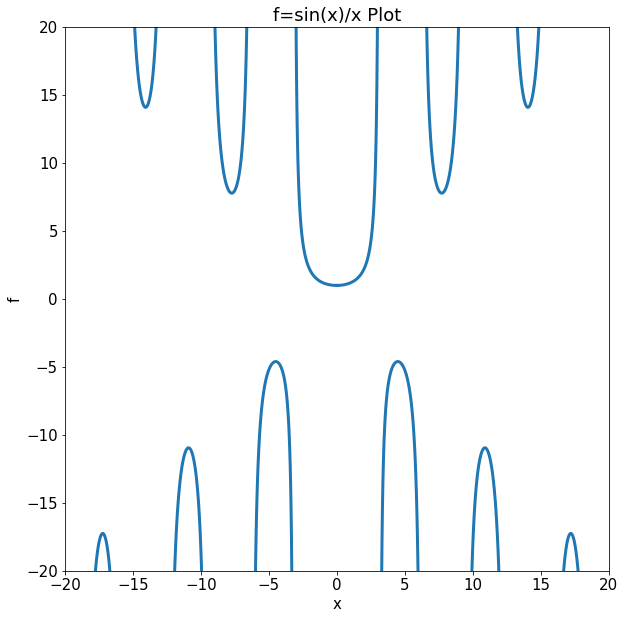

In [142]:
def sinx_x(limit=[-20,20,-20,20],size=10):
    def load(x): return x/math.sin(x)

    f = np.vectorize(load)
    a = size
    for i in np.arange(-a, a+1):
        x = np.linspace(i*math.pi+0.00000001, i *
                        math.pi+math.pi-0.00000001, 100)
        y = f(x)
        plt.plot(x, y, 'tab:blue', linewidth=3)
    plt.xlim(limit[0], limit[1])
    plt.ylim(limit[2], limit[3])
    plt.title('f=sin(x)/x Plot')
    plt.xlabel('x')
    plt.ylabel('f')
    ax = plt.gca()
    ax.set_aspect('equal')


sinx_x()


## Given f -> x?
$$
F_{NL}(x)\approx F_L(x) = c_1+c_2x \implies F_L(x)=\big(F_{NL}(x_0)-F'_{NL}(x_0)*x_0\big)+F'_{NL}(x_0)*x
$$
$$
F_{NL}(x) \equiv f=\frac{x}{\sin x},\quad F_L(x)\equiv f = \Big(\frac{x_0}{\sin x_0}-\frac{\sin x_0 - x_0\cos x_0}{\sin^2 x_0}x_0\Big)+\frac{\sin x_0 - x_0\cos x_0}{\sin^2 x_0}x
$$

In [150]:
def F_linear(x_0, f):
    a = (math.sin(x_0)-x_0*math.cos(x_0))/(math.sin(x_0))**2
    b = x_0/math.sin(x_0)
    x = (f-(b-a*x_0))/a
    return x


def F_nlinear(x): return x/math.sin(x)


def f_line(f,xlim1,xlim2): return plt.plot(np.linspace(xlim1, xlim2, 100),
                               np.full((100), f), 'k', linewidth=1.5)


def solve(x_initial=2.6, f=1.2, plotarea=[-3, 3, 0, 5], view=True):
    x_coord = np.array([x_initial])
    y_coord = np.array([F_nlinear(x_initial)])
    tolerance = 0.000001
    while True:
        x_sol = F_linear(x_coord[-1], f)
        x_coord = np.append(x_coord, x_sol)
        y_coord = np.append(y_coord, f)

        f_esti = F_nlinear(x_sol)
        x_coord = np.append(x_coord, x_sol)
        y_coord = np.append(y_coord, f_esti)

        error = abs((f-f_esti)/f)
        if error <= tolerance:
            if view == True:
                print("Solution is : x = %f" % (x_sol))
                print("Corresponding 'f' = %f" % (F_nlinear(x_sol)))
            break
        elif x_coord.size/2 > 100:
            break
    if view==True:
        sinx_x(plotarea)
        f_line(f,plotarea[0], plotarea[1])
        plt.plot(x_coord, y_coord, '*-r', linewidth=2)
        print("Number of iterations = %d" % ((x_coord.size)/2))
    else:
        return x_sol


### Examples

Solution is : x = 1.026738
Corresponding 'f' = 1.200000
Number of iterations = 7


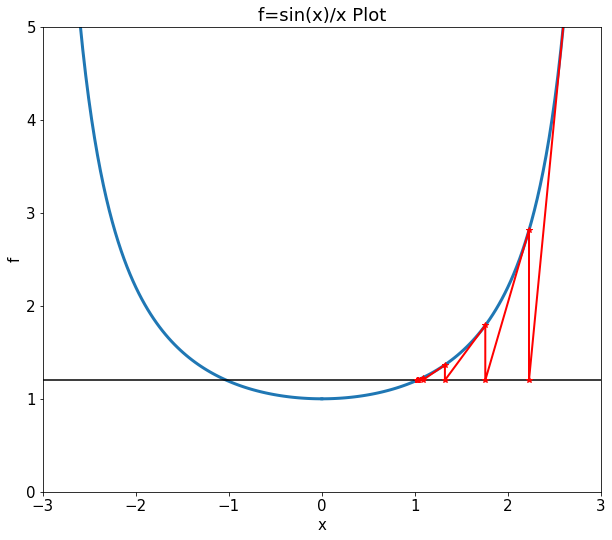

In [151]:
solve()

Solution is : x = -1.026739
Corresponding 'f' = 1.200000
Number of iterations = 43


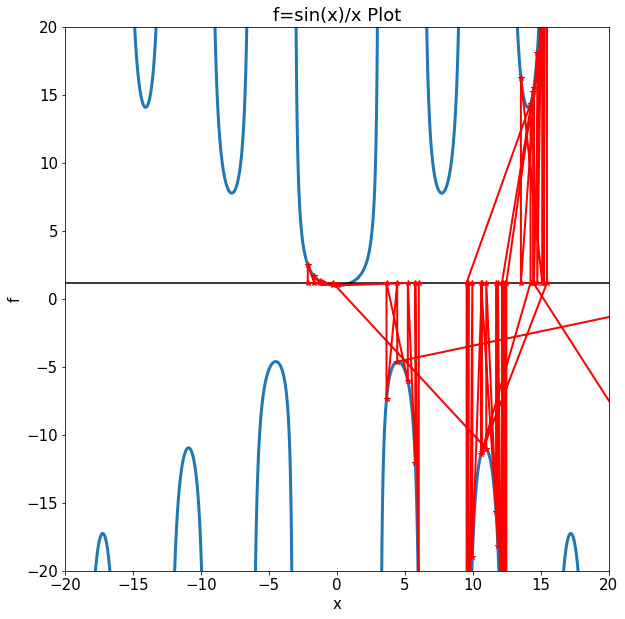

In [152]:
solve(x_initial=0.1, f=1.2, plotarea=[-20,20,-20,20], view=True)

Number of iterations = 100


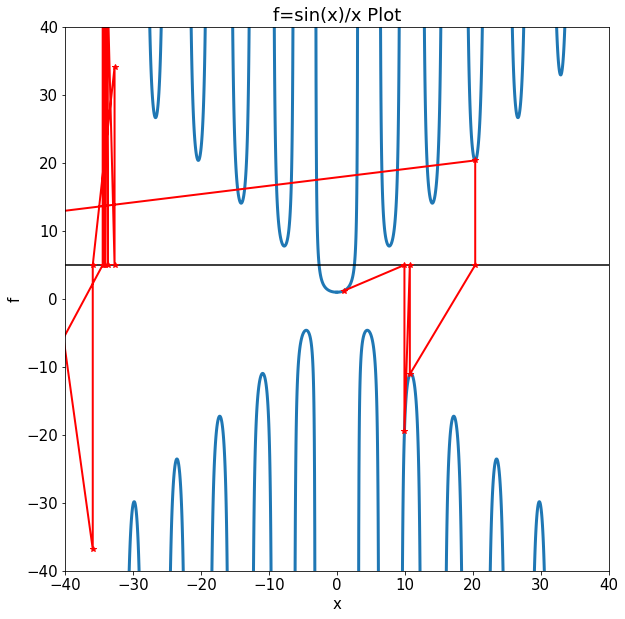

In [153]:
solve(x_initial=1, f=5, plotarea=[-40,40,-40,40], view=True)

## Solution

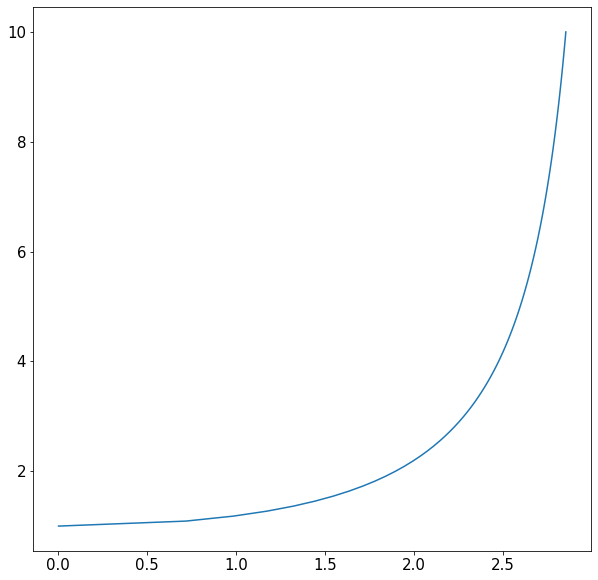

In [155]:
f_grid = np.linspace(1,10,100)
x_grid = np.array([])
for fi in f_grid:
    x_grid = np.append(x_grid, solve(x_initial=3, f=fi, view=False))
plt.plot(x_grid,f_grid)